# Heart Disease Classification and Prediction - Ganesh Ram Gururajan

## Data import and visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('C:/Users/ganes/Data Science/Datasets/hdd.csv')

In [4]:
data.shape

(303, 14)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


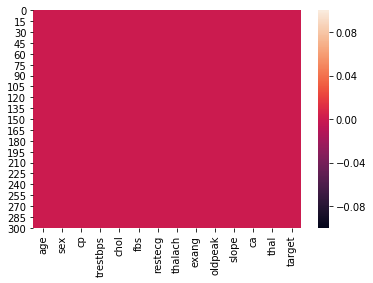

In [6]:
sns.heatmap(data.isnull())

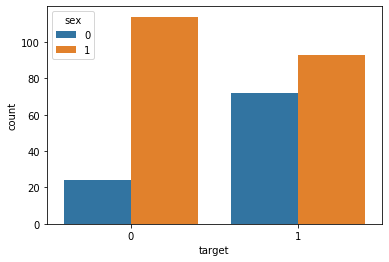

In [8]:
sns.countplot(x = 'target', hue= 'sex', data=data)

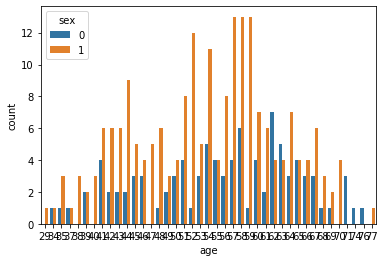

In [11]:
sns.countplot(x = 'age', hue= 'sex', data=data)

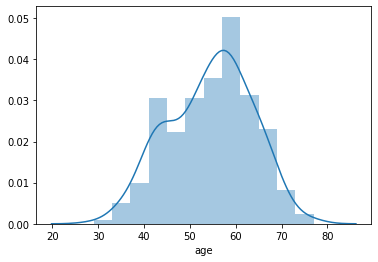

In [12]:
sns.distplot(data['age'])

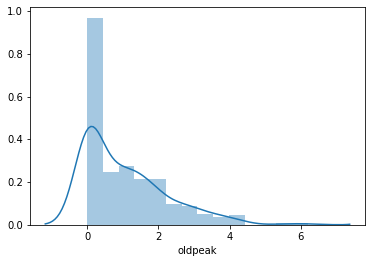

In [17]:
sns.distplot(data['oldpeak'])

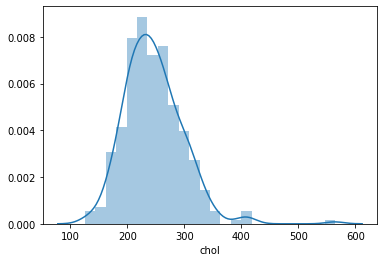

In [14]:
sns.distplot(data['chol'])

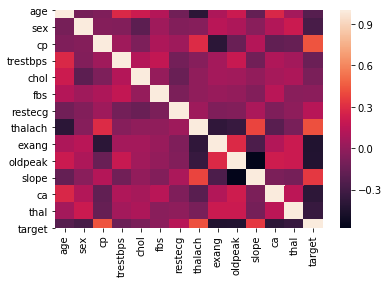

In [13]:
sns.heatmap(data.corr())

## Train Test Split

In [19]:
X = data.drop(['target'],axis=1)

In [20]:
y = data['target']

In [21]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1, stratify = y)

In [41]:
X_train.shape,y_train.shape

((272, 13), (272,))

## Random Forest Classification and Evaluation

In [42]:
from sklearn.ensemble import RandomForestClassifier

## Finding the best value for n_estimators parameter

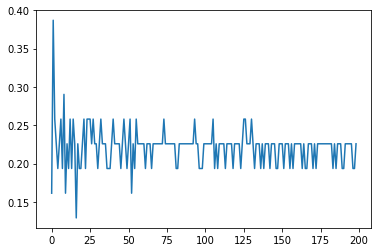

In [49]:
error = []

for i in range(1,200):
    rf_i = RandomForestClassifier(n_estimators=i)
    rf_i.fit(X_train,y_train)
    pred_i = rf_i.predict(X_test)
    error.append(np.mean(y_test != pred_i))
    
plt.plot(error)

In [50]:
print(error.index(min(error)))

16


In [51]:
rf = RandomForestClassifier(n_estimators=16)

In [52]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=16,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
pred1 = rf.predict(X_test)

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.79      0.88      0.83        17

    accuracy                           0.81        31
   macro avg       0.81      0.80      0.80        31
weighted avg       0.81      0.81      0.80        31

